In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [3]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [38]:
#checking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [39]:
#cheking the top 5 genre in Genre column 
df['Genre'].head(5)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [40]:
# To check the duplicate rows
#sum for count duplicate values
# one question occurs 
#if duplicates occurs how to remove duplicates
df.duplicated().sum()

0

In [41]:
# to check the statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary
#### we have a dataframe consisting of 9827 rows and 9 columns.
#### our dataset looks a bit tidy with no NaNs nor duplicated values.
#### Release_Date column needs to be casted into date time and to extract only the year values.
#### Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so well drop them.
#### there is noticable outliers in Popularity column
#### Vote_Average bettter be categorised for proper analysis.
#### Genre column has comma saperated values and white spaces that needs to be handle and casted into category. Exploration summary


In [42]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [43]:
# changing the Release Date data type object to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtype)

datetime64[ns]


In [44]:
#making the datetime datatpe data only cotain year
df['Release_Date'] = df['Release_Date'].dt.year

In [45]:
df['Release_Date'].dtypes

dtype('int32')

In [46]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [47]:
columns = ['Overview', 'Original_Language', 'Poster_Url']

#Removing unwanted columns
df.drop(columns, axis = 1, inplace = True)

In [48]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### Vote_Average Categirazition 
#### We would cut the  Vote_Average  values and make 4 categories:  popular ,   average , below_avg,   not_popular  to describe it more using  catigorize_col()  functionprovided above.

In [49]:
def categories_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
   
    ]   
    #here we are using pd.cut to create bins for the data
    #pd.cut() is used to segment and sort data values into bins
    #pd.cut is used to categoriza the data 

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates ='drop')
    return df


In [50]:
labels = ['not popular', 'below average', 'average', 'popular']

categories_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not popular,Horror
9824,2016,The Offering,13.355,94,not popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [51]:
df['Vote_Average'].unique()

['popular', 'below average', 'average', 'not popular', NaN]
Categories (4, object): ['not popular' < 'below average' < 'average' < 'popular']

In [52]:
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
5,2022,The Commando,1750.484,33,average,"Action, Crime, Thriller"
6,2022,Scream,1675.161,821,average,"Horror, Mystery, Thriller"
7,2022,Kimi,1601.782,206,below average,Thriller
8,2022,Fistful of Vengeance,1594.013,114,not popular,"Action, Crime, Fantasy"
9,2021,Eternals,1537.406,4726,popular,Science Fiction


In [53]:
df['Vote_Average'].value_counts()

Vote_Average
not popular      2467
popular          2450
average          2412
below average    2398
Name: count, dtype: int64

In [54]:
#checking null values or removing null values

df.dropna(inplace = True)

df.isnull().sum()


Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

### we'd split genres into a list and thenexplode our dataframe to have only onegenre per row for ezch movie

In [55]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(',')

# explode the lists into separate rows
df = df.explode('Genre').reset_index(drop = True)


df


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama


In [ ]:
# changing the data type of Genre column to category
# The category data type is useful for categorical variables that have a fixed number of possible values
df['Genre'] = df['Genre'].astype('category')


#checking the data type of Genre column 
df['Genre'].dtype

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 750.3+ KB


In [67]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             38
dtype: int64

### Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551rows to dig into during our analysis

## Data Visualization
### here, we'd use Matplotlib and seaborn for making some informative visuals to gaininsights abut our data

In [68]:
# setting up seaborn configurations
sns.set_style('whitegrid') 

### Q1: What is the most frequent genre inthe dataset?

In [69]:
# showing stats. on genre column
df['Genre'].describe()

count         25552
unique           38
top        Thriller
freq           1960
Name: Genre, dtype: object

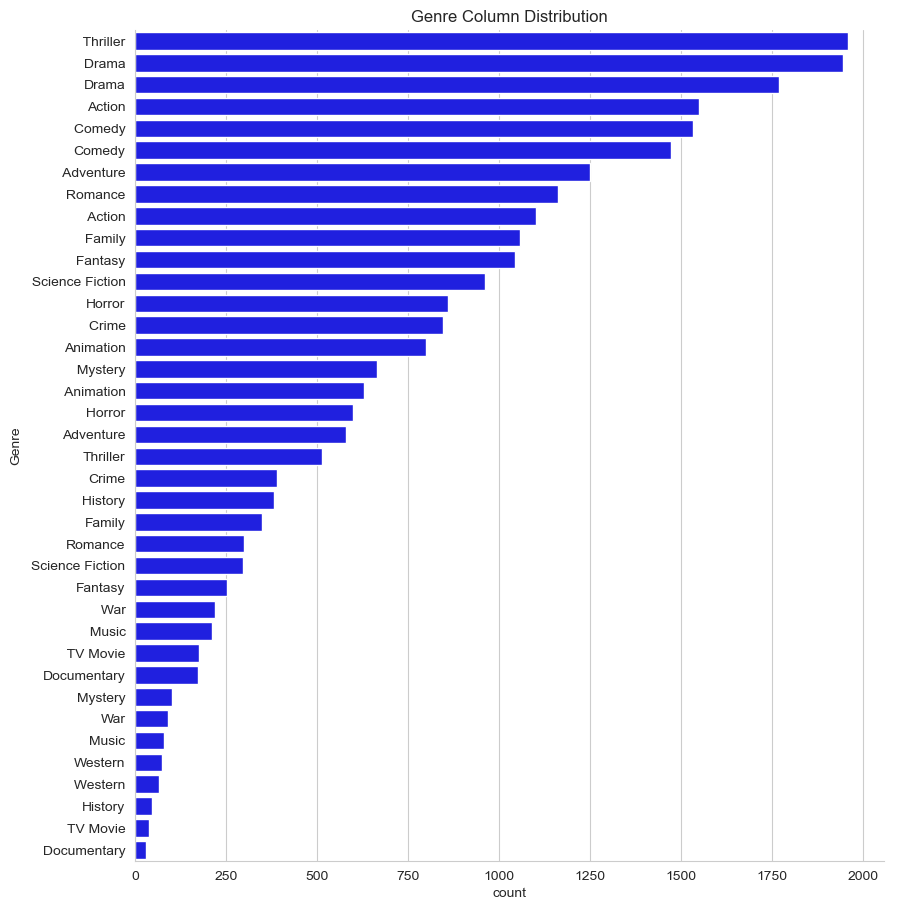

In [78]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color = 'blue', height = 9)

plt.title('Genre Column Distribution')
plt.show()

## Q2: What  genres  has highest  votes ?

In [80]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


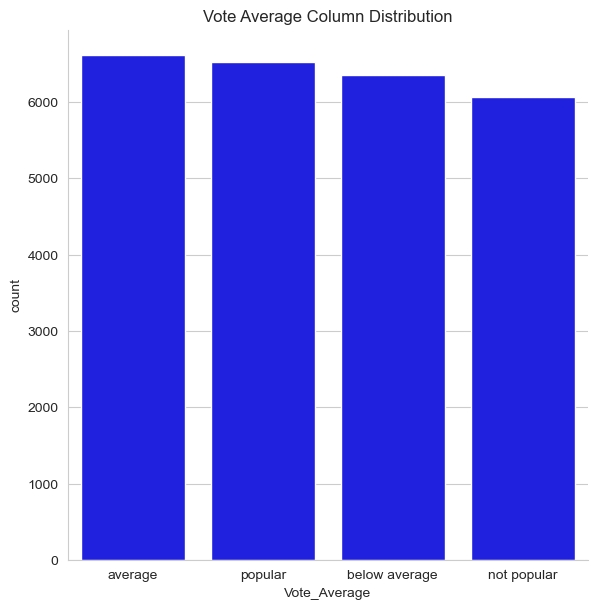

In [86]:
sns.catplot(x = 'Vote_Average',data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = 'blue', height = 6)
plt.title('Vote Average Column Distribution')
plt.show()

## Q3: What movie got the highest  popularity ? what's its genre ?

In [87]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [90]:
# checking the most popular movie
df[df['Popularity'] == df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [92]:
# checking the lowest popular movie
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


## Q5: Which year has the most filmmed movies?

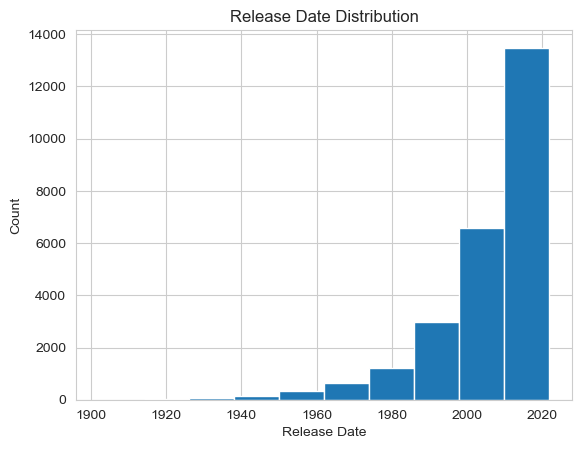

In [94]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.xlabel('Release Date')  
plt.ylabel('Count')
plt.show()

## Conclusion :

#### Q1: What is the most frequent  genre  in the dataset?
Drama  genre is the most frequent genre in our dataset and has appeared more than14% of the times among 19 other genres.

#### Q2: What  genres  has highest  votes ?
we have 25.5% of our dataset with popular vote (6520 rows).  Drama  again gets thehighest popularity among fans by being having more than 18.5% of movies popularities.

#### Q3: What movie got the highest  popularity ? what's its  genre ?
Spider-Man: No Way Home  has the highest popularity rate in our dataset and it hasgenres of  Action ,  Adventure  and  Sience Fiction .

#### Q4: What movie got the lowest  popularity ? what's its  genre ?
The united states, thread' has the highest lowest rate in our dataset and it has genres of music , drama , 'war', 'sci-fi' and history`.

#### Q5: Which year has the most filmmed movies?
year  2020  has the highest filmming rate in our dataset.